<h1>Teoria nessa celula de texto:</h1>
<hr>
<p>As RNAs emulam o comportamento do cerebro humano
  <ul>
    <li>Neuronios == Perceptrons</li>
    <li>Conexoes entre os perceptros === sinapses</li>
    <li>ate 100 trilhoes de sinapses no nosso cerebro</li>
    <li>eh um algoritmo biologico</li>
  </ul>
</p>
<p>
  O perceptron eh um classificado simples de 1 unica camada, <mark>pode ter apenas uma saida [1 e -1]; toda RNA deve ter, pelo menos:</mark>
  <ol>
    <li>Camada de entrada</li>
    <li>Camadad de saida</li>
  </ol>
  <br>
  O perceptron tem uma funçao de saida [softmax, sigmoide, etc.] e as entradas tem pesos, e o perceptron tambem tem um vies/BIAS
</p>
<p>
  No modelo de RNA temos:
    Epoch, Iteration, Batch_size
    <br>
    Epoch --> Passar todos os dados pela RNA 1 unica vez
    <br>
    Batch Size ==> Numero de registyros a rserem passadaos numa iteraç~ao
</p>
<hr>
<p>
  Largura de uma camada de uma RNA === numero de nos/perceptron que ela possui
  camada de entrada, camadas ocultas, camada de saida;
  <br>
  <ul id = 'x1'>
    <label for = 'x1'>Classificaçao de RNAs</label>
    <li>Topologia: Estrutura de nos e camadas [Full coneccted (todos os nos conectados, RNA densa)]</li>
    <li>Arquitetura:
      <ul>
        <li>Feed-Foward</li>
        <li>Recorrente-Retorno
          [recorrente --> nos de diferentes camadas conversam entre si]
        </li>
      </ul>
    </li>
    <li>Numero de saidas [1 ou +]</li>
  </ul>
</p>
<p>RNAs profundas [deep learning], voce NAO deve usa-las para resolver problemas de [shallow learning --com dados estruturados --]</p>
<p>Tarefas de deep learning envolvem reconhecimento facial, de voz, de imagem, LLMs, etc</p>

<h1><mark>Fazendo uma RNA [aula 71]</mark></h1>

In [ ]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [ ]:
model = MLPClassifier(
    verbose = True,
    hidden_layer_sizes = (5,4),
    activation = "relu",
    batch_size = 20,
    learning_rate = "adaptive",
    momentum = 0.9,
    early_stopping = False,
    max_iter = 1000,
    random_state = 10
)

model.fit(x_treino,y_treino)

Iteration 1, loss = 1.86199863
Iteration 2, loss = 1.78774059
Iteration 3, loss = 1.71916423
Iteration 4, loss = 1.65482437
Iteration 5, loss = 1.59646768
Iteration 6, loss = 1.54494999
Iteration 7, loss = 1.49711949
Iteration 8, loss = 1.45115777
Iteration 9, loss = 1.41039240
Iteration 10, loss = 1.37009929
Iteration 11, loss = 1.33470225
Iteration 12, loss = 1.29813287
Iteration 13, loss = 1.26521765
Iteration 14, loss = 1.23785768
Iteration 15, loss = 1.21723789
Iteration 16, loss = 1.20077631
Iteration 17, loss = 1.18917561
Iteration 18, loss = 1.17892593
Iteration 19, loss = 1.17039574
Iteration 20, loss = 1.16311270
Iteration 21, loss = 1.15636507
Iteration 22, loss = 1.15022374
Iteration 23, loss = 1.14390052
Iteration 24, loss = 1.13758739
Iteration 25, loss = 1.13104511
Iteration 26, loss = 1.12496344
Iteration 27, loss = 1.11836293
Iteration 28, loss = 1.11233657
Iteration 29, loss = 1.10685832
Iteration 30, loss = 1.10070925
Iteration 31, loss = 1.09485627
Iteration 32, los

MLPClassifier(batch_size=20, hidden_layer_sizes=(5, 4),
              learning_rate='adaptive', max_iter=1000, random_state=10,
              verbose=True)

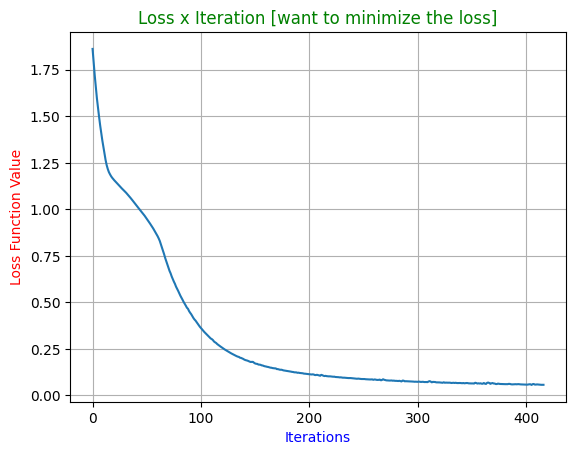

In [ ]:
plt.plot(model.loss_curve_)
plt.xlabel("Iterations", color = 'blue')
plt.ylabel("Loss Function Value", color = 'red')
plt.title("Loss x Iteration [want to minimize the loss]", color = "green")
plt.grid(True)

In [ ]:
previsoes = model.predict(x_teste)
previsoes

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [ ]:
print(accuracy_score(y_teste, previsoes))

0.9777777777777777


## Aula 72 --> RNA Com KERAS [Exemplo um pouco mais sofisticado]

<h2>A Keras usa a TensorFlow por default</h2>
<hr>
<ul>
  <label>Relembrando [base, meio, complexo, sofisticado]</label>
  <li>Pandas, Numpy, Seaborn, Matplotlib</li>
  <li>Sklearn, Pytorch, Tensor Flow</li>
  <li>KERAS</li>
  <li>OPEN AI</li>
</ul>

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [20]:
#fazer upload da churn analysis [chjances de clientes e/ou colaboradores deixarem a empresa em quanto tempo]
df_obj = pd.read_csv("Churn_treino.csv", sep =';')
df_obj.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0,1,1,1,10134888,1
1,608,Spain,Female,41,1,8380786,1,0,1,11254258,0
2,502,France,Female,42,8,1596608,3,1,0,11393157,1
3,699,France,Female,39,1,0,2,0,0,9382663,0
4,850,Spain,Female,43,2,12551082,1,1,1,790841,0


In [17]:
x = df_obj.drop("Exited", axis = 1)
y = df_obj["Exited"]

In [21]:
standardscaler = StandardScaler() ##faça antes do LabelEncoder, se nao vai padronizar o codigo das var categoricas junto [ruim]
numerical = x.select_dtypes(include = ['int64','float64']).columns
x[numerical] = standardscaler.fit_transform(x[numerical])

In [22]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,France,Female,0.293517,-1.041760,-1.110553,-0.911583,0.646092,0.970243,0.170614
1,-0.440036,Spain,Female,0.198164,-1.387538,0.222782,-0.911583,-1.547768,0.970243,0.353281
2,-1.536794,France,Female,0.293517,1.032908,-0.856542,2.527057,0.646092,-1.030670,0.375948
3,0.501521,France,Female,0.007457,-1.387538,-1.110553,0.807737,-1.547768,-1.030670,0.047859
4,2.063884,Spain,Female,0.388871,-1.041760,0.886252,-0.911583,0.646092,0.970243,-1.354223
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,France,Male,0.007457,-0.004426,-1.110553,0.807737,0.646092,-1.030670,0.087743
9996,-1.391939,France,Male,-0.373958,1.724464,-0.197835,-0.911583,0.646092,0.970243,0.176340
9997,0.604988,France,Female,-0.278604,0.687130,-1.110553,-0.911583,-1.547768,0.970243,-0.796492
9998,1.256835,Germany,Male,0.293517,-0.695982,0.083852,0.807737,0.646092,-1.030670,0.032551


In [26]:
labelencoder = LabelEncoder()##agora sim, labelencoder
categorical = x.select_dtypes(include = 'object').columns
#x[categorical] = labelencoder.fit_transform() ##o classificador-modelo RNA precisa td ser numerico,ate a saida

for col in categorical:
  x[col] = labelencoder.fit_transform(x[col])

In [27]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0,0,0.293517,-1.041760,-1.110553,-0.911583,0.646092,0.970243,0.170614
1,-0.440036,2,0,0.198164,-1.387538,0.222782,-0.911583,-1.547768,0.970243,0.353281
2,-1.536794,0,0,0.293517,1.032908,-0.856542,2.527057,0.646092,-1.030670,0.375948
3,0.501521,0,0,0.007457,-1.387538,-1.110553,0.807737,-1.547768,-1.030670,0.047859
4,2.063884,2,0,0.388871,-1.041760,0.886252,-0.911583,0.646092,0.970243,-1.354223
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0,1,0.007457,-0.004426,-1.110553,0.807737,0.646092,-1.030670,0.087743
9996,-1.391939,0,1,-0.373958,1.724464,-0.197835,-0.911583,0.646092,0.970243,0.176340
9997,0.604988,0,0,-0.278604,0.687130,-1.110553,-0.911583,-1.547768,0.970243,-0.796492
9998,1.256835,1,1,0.293517,-0.695982,0.083852,0.807737,0.646092,-1.030670,0.032551


In [28]:
x_treino,x_teste, y_treino, y_teste = train_test_split(
    x,y,  test_size = 0.3, random_state = 0
)

In [29]:
model = Sequential()
model.add(Dense(units= 64, activation = "relu", input_dim = x_treino.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(units = 32, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(units = 32, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(units = 1, activation = "sigmoid")) ##camada de saida com 1 so neuronio

#sim, a topologia e arquitetura da sua RNA esta aqui nesse snippet

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model.fit(x_treino, y_treino, epochs = 50, batch_size = 32)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7064 - loss: 0.5988
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8031 - loss: 0.4715
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8018 - loss: 0.4637
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8010 - loss: 0.4503
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8094 - loss: 0.4443
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8095 - loss: 0.4400
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8092 - loss: 0.4218
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8119 - loss: 0.4349
Epoch 9/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8246 - loss: 0.4082
Epoch 10/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8305 - loss: 0.4101
Epoch 11/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8306 - loss: 0.4049
Epoch 12/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [32]:
previsoes = model.predict(x_teste)

previsoes

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.24973705],
       [0.3590175 ],
       [0.20238017],
       ...,
       [0.08020846],
       [0.12467655],
       [0.4929126 ]], dtype=float32)

In [33]:
y_pred = (previsoes > 0.5).astype("int32")
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [35]:
print("Acuracia: ", accuracy_score(y_teste, y_pred))
print("F1: ", f1_score(y_teste, y_pred))# average = ""))
print("Recall: ", recall_score(y_teste, y_pred))
print("Matriz de Confusao/Fuzzy Matrix: ", confusion_matrix(y_teste, y_pred))

Acuracia:  0.8603333333333333
F1:  0.5822532402791625
Recall:  0.47020933977455714
Matriz de Confusao/Fuzzy Matrix:  [[2289   90]
 [ 329  292]]
